# Load Games

In [2]:
import pandas as pd
import pickle
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  
sns.set_style('darkgrid')
%matplotlib inline
    

with open(f"data/TM_games.pkl", "rb") as file:
    datadict = pickle.load(file) 

    
print('Number of games:')
print(len(datadict))    
keys = list(datadict.keys())

# Initialize the two new dictionaries
gamedict = {}
logdict = {}

# Iterate over the original game_dict
for key, value in datadict.items():
    # value[0] is the dataframe of statistics, so add it to gamedict
    gamedict[key] = value[0]
    
    # value[1] is the long string of the gamelog, so add it to logdict
    logdict[key] = value[1]
      

Number of games:
1556


# Data Example

In [3]:
# Each game is contained as a ke
gamedict['Game200']
# corresponding gamelog in logdict['Game200']

,VP from cards,VP from cities,VP from greeneries,VP from Terraforming Rating,VP from Milestones,VP from Awards,VP total,Number of actions,Corporations,Table ID,Elo,Rank,Player Names,Generations
0,31,0,10,38,10,12,101,66,InterplanetaryCinematics,https://boardgamearena.com/table?table=540759025,519,1,greenmars1,11
1,33,5,2,40,0,4,84,46,Inventrix,https://boardgamearena.com/table?table=540759025,175,2,penguin65,11
2,33,3,0,35,5,5,81,59,ThorGate,https://boardgamearena.com/table?table=540759025,256,3,Asx3t0s,11


# Corporations

In [2]:
from helper_functions import *
sort_by = 'Win Rate'
#sort_by = 'WAP'
corp_df = corp_ranking(gamedict,sort_by)
corp_df

,Corporation,Participation Count,Wins,Win Rate,WAP
0,CrediCor,528,225,42.61,0.053
1,InterplanetaryCinematics,421,177,42.04,0.100
2,SaturnSystems,474,176,37.13,0.110
3,Ecoline,375,138,36.80,0.066
4,TharsisRepublic,580,210,36.21,0.067
5,MiningGuild,448,154,34.38,0.052
6,Teractor,442,137,31.00,-0.038
7,PhoboLog,323,94,29.10,-0.104
8,Helion,333,86,25.83,-0.114
9,ThorGate,226,58,25.66,-0.103


# Cards

In [3]:
#sortby = "WAP"
sortby = "Win Rate"
cards,milestones,awards,awards_score = log_stats(gamedict,logdict,sortby)
cards.head(15)

,Card,Plays,Wins,Win Rate,WAP
0,ICE CAP MELTING,157,85,54.14,0.157
1,ADVANCED ECOSYSTEMS,787,425,54.00,0.138
2,INSECTS,860,463,53.84,0.080
3,ECOLOGICAL ZONE,1062,563,53.01,0.085
4,INVESTMENT LOAN,1137,597,52.51,0.114
5,INDENTURED WORKERS,921,477,51.79,0.047
6,HERBIVORES,628,325,51.75,0.066
7,NITROGEN-RICH ASTEROID,937,484,51.65,0.073
8,MANGROVE,628,320,50.96,0.085
9,VIRUS,707,358,50.64,0.085


In [4]:
# Search for a specific card
string = "MEDIA GROUP"
mask = cards['Card'].str.contains(string)
cards[mask]

,Card,Plays,Wins,Win Rate,WAP
15,MEDIA GROUP,1137,556,48.9,0.075


In [5]:
cards.tail(10)

,Card,Plays,Wins,Win Rate,WAP
198,SOIL FACTORY,365,81,22.19,-0.063
199,FUSION POWER,487,101,20.74,-0.060
200,AEROBRAKED AMMONIA ASTEROID,231,46,19.91,-0.055
201,DUST SEALS,204,40,19.61,-0.044
202,FOOD FACTORY,309,60,19.42,-0.100
203,SPACE MIRRORS,276,48,17.39,-0.109
204,MICRO-MILLS,299,51,17.06,-0.098
205,POWER GRID,140,21,15.00,-0.042
206,SECURITY FLEET,341,39,11.44,-0.084
207,UNDERGROUND DETONATIONS,51,4,7.84,-0.212


In [6]:
gens = [1,2,3] # Look at winrate only for cards played within specific generations 
min_plays = 10
sortby = 'Win Rate'
#sortby = 'WAP'
cards_gen = card_gen(gamedict,logdict,gens,sortby,min_plays)
cards_gen.head(10)

,Card,Plays,Wins,Win Rate,WAP
0,ALGAE,15,11,73.33,0.264
1,AI CENTRAL,31,19,61.29,0.201
2,INDENTURED WORKERS,202,105,51.98,0.082
3,METHANE FROM TITAN,29,15,51.72,0.023
4,ECOLOGICAL ZONE,18,9,50.00,0.164
5,SOLETTA,99,48,48.48,0.096
6,FLOODING,264,128,48.48,0.075
7,HEAT TRAPPERS,90,43,47.78,0.065
8,GIANT ICE ASTEROID,97,46,47.42,0.105
9,MOHOLE AREA,302,143,47.35,0.140


# Card winrate evolution

In [7]:
soletta = []
mohole = []
archive = []
tg = []
gens = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
sortby = 'Win Rate'
min_plays=1
for gen in gens:
    print('Generation',gen)
    gen = [gen]
    cards_gen = card_gen(gamedict,logdict,gen,sortby,min_plays)
    
    string = "SOLETTA"
    mask = cards_gen['Card'].str.contains(string)
    if mask.any():
        soletta.append(cards_gen[mask]['Win Rate'].iloc[0])
    else:
        soletta.append(0)
        
    string = "MOHOLE"
    mask = cards_gen['Card'].str.contains(string)
    if mask.any():
        mohole.append(cards_gen[mask]['Win Rate'].iloc[0])
    else:
        mohole.append(0)
    
    string = "ARCHIVE"
    mask = cards_gen['Card'].str.contains(string)
    if mask.any():
        archive.append(cards_gen[mask]['Win Rate'].iloc[0])
    else:
        archive.append(0)
    
    string = "GANY"
    mask = cards_gen['Card'].str.contains(string)
    if mask.any():
        tg.append(cards_gen[mask]['Win Rate'].iloc[0])
    else:
        tg.append(0)  

Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14


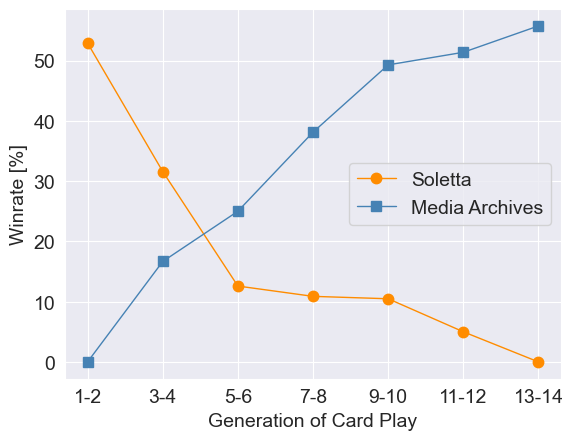

In [16]:
linewidth = 1

gens = np.array(gens)
mohole = np.array(mohole)
soletta = np.array(soletta)
tg = np.array(tg)
archive = np.array(archive)
# Function to bin data and compute the mean for every second generation
def bin_and_mean(data, bin_size=2):
    binned_data = data.reshape(-1, bin_size).mean(axis=1)
    return binned_data

# Bin generations (take the mean of [1, 2], [3, 4], etc.)
binned_gens = gens.reshape(-1, 2).mean(axis=1)

# Bin the win rate data
binned_mohole = bin_and_mean(mohole)
binned_soletta = bin_and_mean(soletta)
binned_archive = bin_and_mean(archive)
binned_tg = bin_and_mean(tg)


# Create x-axis labels for bin ranges like [1-2], [3-4], etc.
bin_labels = [f'{gens[i]}-{gens[i+1]}' for i in range(0, len(gens), 2)]

# Plot the binned data
linewidth = 1
fontsize=14
#plt.plot(binned_gens, binned_mohole, 'D-', c='brown', label='Mohole', linewidth=linewidth)
plt.plot(binned_gens, binned_soletta, 'o-', c='darkorange', label='Soletta', linewidth=linewidth,markersize=7.5)
plt.plot(binned_gens, binned_archive, 's-', c='steelblue', label='Media Archives', linewidth=linewidth,markersize=7.5)
#plt.plot(binned_gens, binned_tg, 'D-', c='forestgreen', label='Terraforming Ganymedes', linewidth=linewidth)

# Set x-axis labels
plt.xticks(binned_gens, bin_labels)


plt.ylabel('Winrate [%]',fontsize=fontsize)
plt.xlabel('Generation of Card Play',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='center right',fontsize=fontsize)
#plt.savefig('figs/CardWin.png')

# Gens

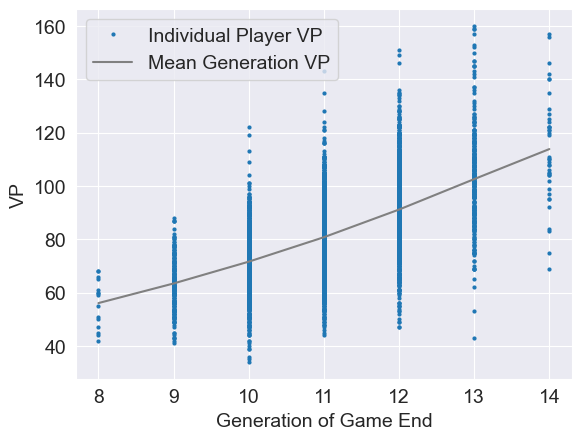

In [21]:
# Finding average vp per generation

vp_list  = []
gen_list = []
elo_list = []
corp_list = []
win_corp_list = []
game_ids = []

for game in keys:
    gamestats = gamedict[game]
    win_corp_list.append(gamestats['Corporations'].iloc[0])  
    #gens.append(gamestats['Generations'].iloc[0])    
    for player in range(3):
        gen_list.append(gamestats['Generations'].iloc[player])    
        vp_list.append(gamestats['VP total'].iloc[player])
        elo_list.append(gamestats['Elo'].iloc[player])
        game_ids.append(game)
        
games = np.array(game_ids)        
vps = np.array(vp_list).astype(int)
gens = np.array(gen_list).astype(int)
#gens = np.array(gens).astype(int)
elos = np.array(elo_list).astype(int)
corps = np.array(corp_list)
win_corps = np.array(win_corp_list)
plt.plot(gens,vps,'.',markersize=4,label='Individual Player VP');

gen_vp = []
for i in [8,9,10,11,12,13,14]:
    gen_mask = np.where(gens==i)[0]
    gen_vp.append(np.mean(vps[gen_mask]))
plt.plot(np.arange(8,15),gen_vp,c='grey',label='Mean Generation VP')
plt.ylabel('VP',fontsize=fontsize)
plt.xlabel('Generation of Game End',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)

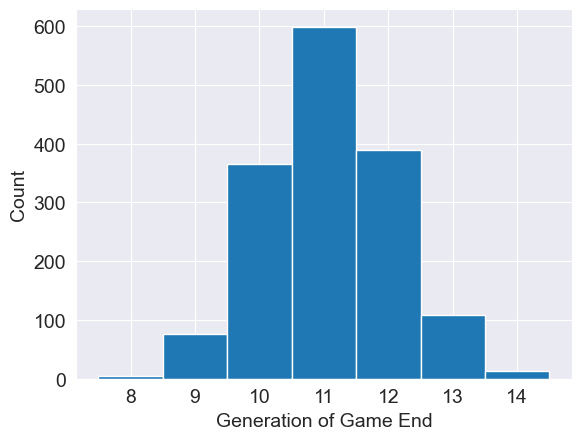

In [27]:
# Assign weights to reduce height by 3 since im counting the same end generation for everyone of the 3 players
weights = [1/3] * len(gens)

# Create histogram with bin edges to center on integers
plt.hist(gens, bins=[7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5],weights=weights)
plt.xticks(range(8, 15))  # Set x-ticks to show the integer values
plt.xlabel('Generation of Game End',fontsize=fontsize)
plt.ylabel('Count',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.savefig('figs/GenHistogram.png')